# Import libraries

In [1]:
# General libraries
import pandas as pd

# Simulation libraries
import skysurvey_sniapop

# Module functions
import ximinf.selection_effects as se
import ximinf.generate_sim as gsim

# Plot libraries
import matplotlib.pyplot as plt

# Generate one test sample

In [2]:
brokenalpha_model = skysurvey_sniapop.brokenalpha_model

M = 1000

params = {
    'mabs': -19.3,
    'alpha_low': -0.271,
    'alpha_high': -0.083,
    'beta': 3.31,
    'gamma': 0.175,
    'sigma_int': 0.15,
}

columns = ['magobs', 'magobs_err','x1', 'x1_err', 'c', 'c_err', 'localcolor', 'localcolor_err', 'mass', 'mass_err', 'prompt', 'z']

data_dict = gsim.simulate_one(
    params_dict=params_dict,
    z_max=0.06,
    M=M,
    cols=columns
)



## Apply selection effect

In [3]:
# Applying selection effect
# print('Applying selection effect...')
# m_lim = 19.5
# data_dict = se.malmquist_bias(data_dict, m_lim, M, len(columns))
# print('...done')

# Plot sample

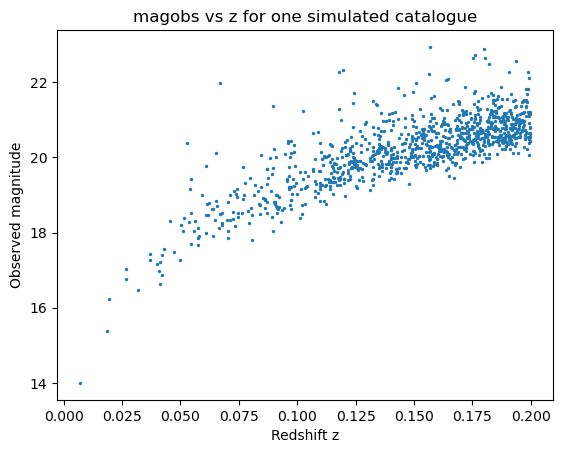

Number of SNe after selection: 1000


In [4]:
df_sel = pd.DataFrame(data_dict)
df_sel_cut = df_sel[df_sel['magobs'] > 0]

# Plot sample
plt.figure()
plt.scatter(df_sel_cut['z'], df_sel_cut['magobs'], s=2)
plt.xlabel("Redshift z")
plt.ylabel("Observed magnitude")
plt.title("magobs vs z for one simulated catalogue")
plt.show()

print('Number of SNe after selection:', len(df_sel_cut['magobs']))

# Save to disk

In [6]:
df_sel_cut.to_parquet("./data/inference_data_frame.parquet")